# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
unique_mice=len(combined_data["Mouse ID"].unique())
unique_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated()]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data[['Mouse ID','Timepoint']].duplicated(keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep = False,inplace=True)

In [6]:
g989_count= combined_data.loc[combined_data["Mouse ID"]=="g989"]
g989_count

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [7]:
#Remove remaining 'g989'
combined_data.drop(combined_data.loc[combined_data["Mouse ID"]=="g989"].index, inplace=True)

In [8]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=len(combined_data['Mouse ID'].unique())
new_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grp_tumor_stats = combined_data.groupby("Drug Regimen").agg(mean_tumor_volume=("Tumor Volume (mm3)","mean"),
    median_tumor_volume=("Tumor Volume (mm3)","median"),
    var_tumor_volume=("Tumor Volume (mm3)","var"),     
    sd_tumor_volume=("Tumor Volume (mm3)","std"),  
    sd_err_tumor_volume=("Tumor Volume (mm3)","sem"))

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume":grp_tumor_stats["mean_tumor_volume"],
                "Median Tumor Volume":grp_tumor_stats["median_tumor_volume"],
                "Tumor Volume Variance":grp_tumor_stats["var_tumor_volume"],
                "Tumor Volume Std. Dev.":grp_tumor_stats["sd_tumor_volume"],
                "Tumor Volume Std. Err.":grp_tumor_stats["sd_err_tumor_volume"]
                                   })

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats = combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
tumor_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested for Each Drug Regimen')

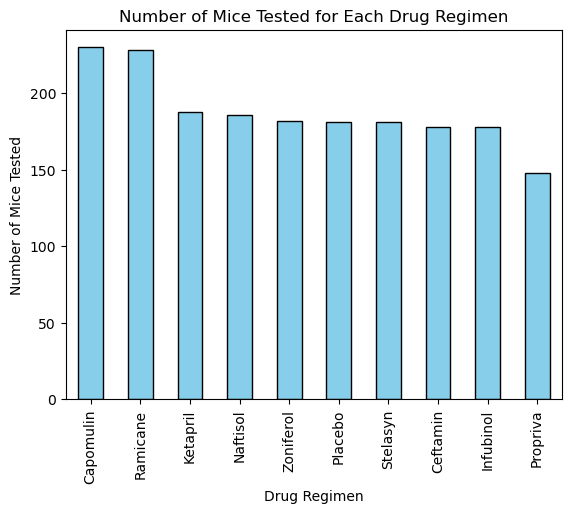

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_t = (combined_data.groupby('Drug Regimen').count()['Mouse ID'])
mice_tested = pd.DataFrame((mice_t).sort_values(ascending=False))

panda_bar = mice_tested.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')

# Adding labels and title
panda_bar.set_ylabel('Number of Mice Tested')
panda_bar.set_xlabel('Drug Regimen')
panda_bar.set_title('Number of Mice Tested for Each Drug Regimen')

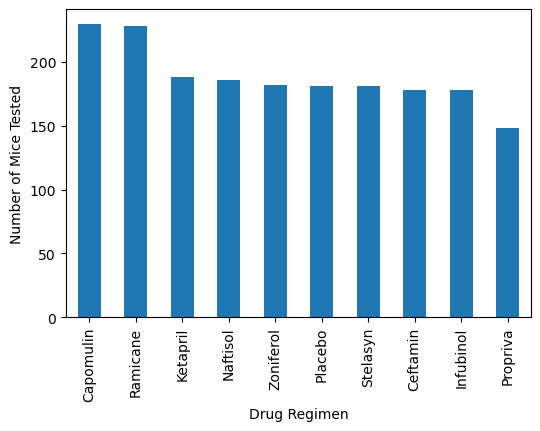

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot=mice_tested.plot(kind='bar', figsize=(6,4),legend='',align="center")

# Set the xlabel and ylabel using class methods
pyplot.set_xlabel("Drug Regimen")
pyplot.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

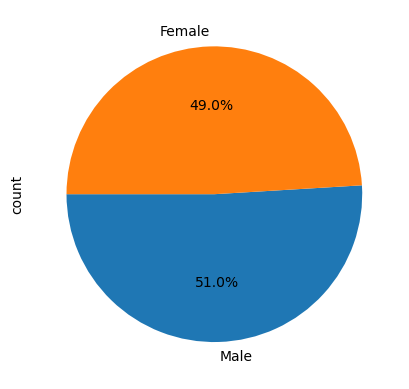

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=combined_data['Sex'].value_counts()

pie_data = pd.DataFrame({'gender': gender_count.index, 'count': gender_count.values})

# Generate pie chart
ax = pie_data.plot.pie(y='count', labels=pie_data['gender'], autopct='%1.1f%%', legend=False,startangle=180)

ax.set_aspect('equal')

plt.show()



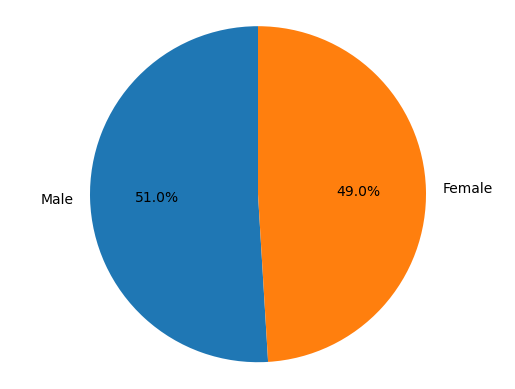

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = combined_data['Sex'].value_counts()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = combined_data.groupby(["Mouse ID"])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = max_timepoint.merge(combined_data,on=['Mouse ID','Timepoint'],how="left")

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

for drug in Drug_Regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = final_data.loc[final_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # append to empty list 
    tumor_volume.append(volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


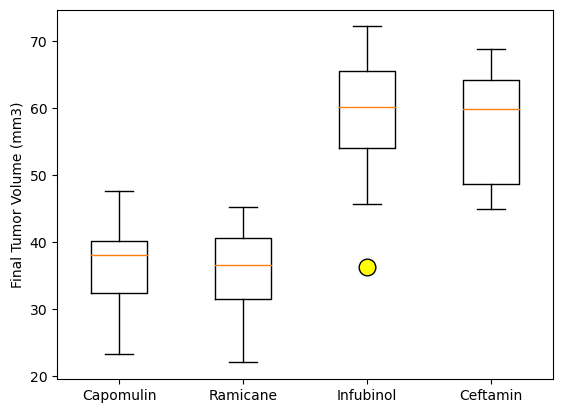

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor='yellow',markersize=12)
plt.boxplot(tumor_volume, labels = Drug_Regimen,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

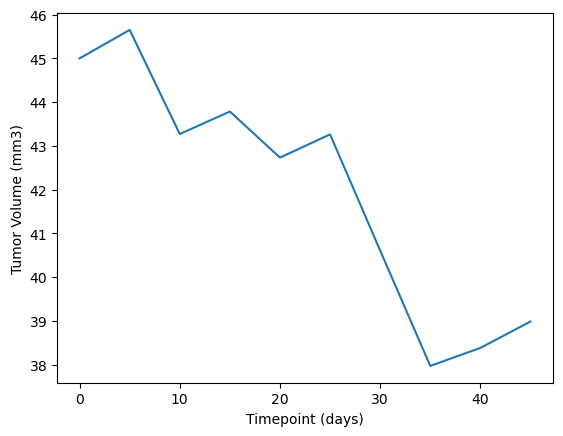

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

b128=combined_data.loc[combined_data["Mouse ID"]=="b128"]

x = "Timepoint"
y ="Tumor Volume (mm3)"

# Initialize an empty list
time_points = []
tumor_volume=[]
# Iterate over the values in the specified column and append them to the list
for value in b128[x]:
    time_points.append(value)

for value in b128[y]:
    tumor_volume.append(value)

plt.plot(time_points, tumor_volume)
plt.xlabel('Timepoint (days)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)

plt.show()

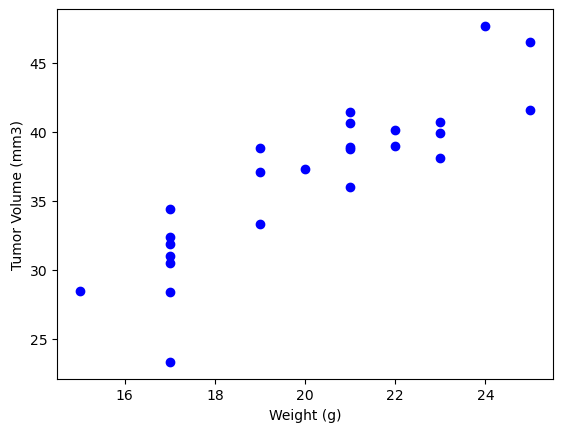

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Drug_Regimen = ["Capomulin"]

# Create empty list to fill with tumor vol data & Weight (for plotting)
y_Avg_Tumor_Vol = [ ]
x_Weight = []

for drug in Drug_Regimen:
       
    volume = final_data.loc[final_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    volume_Avg = (volume).mean()
    Weight_1 = final_data.loc[final_data["Drug Regimen"] == drug, 'Weight (g)']
    Weight_avg = (Weight_1).mean()
    
    y_Avg_Tumor_Vol.append(volume)
    x_Weight.append(Weight_1)
    
plt.scatter(x_Weight, y_Avg_Tumor_Vol, marker="o", facecolors="b", edgecolors="blue")
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)
# plt.ylim(34, 46)
plt.show()

## Correlation and Regression

The Correlation Coefficient between mouse weight and the average tumor volume is 0.88


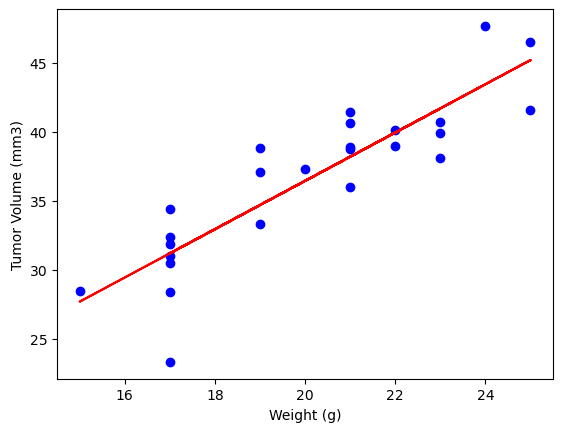

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Drug_Regimen = ["Capomulin"]

y_Avg_Tumor_Vol = []
x_Weight = []

for drug in Drug_Regimen:
    volume = final_data.loc[final_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    volume_Avg = volume.mean()
    Weight_1 = final_data.loc[final_data["Drug Regimen"] == drug, 'Weight (g)']
    Weight_avg = Weight_1.mean()

    y_Avg_Tumor_Vol.extend(volume)  # Use extend instead of append to flatten the list
    x_Weight.extend(Weight_1)

# Scatter plot
plt.scatter(x_Weight, y_Avg_Tumor_Vol, marker="o", facecolors="b", edgecolors="blue")
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_Weight, y_Avg_Tumor_Vol)

# Plot the regression line
plt.plot(x_Weight, intercept + slope * pd.Series(x_Weight), 'r', label='fitted line')

# Display the correlation coefficient
print(f'The Correlation Coefficient between mouse weight and the average tumor volume is {r_value:.2f}')

# Show the plot
plt.show()
